## VGG-16

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Custom dataset for Diseases and pests/train'
valid_path = '/content/drive/MyDrive/Custom dataset for Diseases and pests/val'

In [ ]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Custom dataset for Diseases and pests/train/*')

In [ ]:
x = Flatten()(vgg16.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Custom dataset for Diseases and pests/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 257 images belonging to 5 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Custom dataset for Diseases and pests/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 35 images belonging to 5 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-14-694816f4f14b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/15
9/9 [==============================] - 166s 17s/step - loss: 2.6904 - accuracy: 0.3619 - val_loss: 2.3400 - val_accuracy: 0.4571
Epoch 2/15
9/9 [==============================] - 7s 730ms/step - loss: 1.1161 - accuracy: 0.6265 - val_loss: 0.9630 - val_accuracy: 0.5714
Epoch 3/15
9/9 [==============================] - 6s 611ms/step - loss: 0.5430 - accuracy: 0.8171 - val_loss: 0.9736 - val_accuracy: 0.7143
Epoch 4/15
9/9 [==============================] - 6s 730ms/step - loss: 0.3972 - accuracy: 0.8599 - val_loss: 0.7987 - val_accuracy: 0.6857
Epoch 5/15
9/9 [==============================] - 6s 605ms/step - loss: 0.2503 - accuracy: 0.8988 - val_loss: 0.9508 - val_accuracy: 0.7143
Epoch 6/15
9/9 [==============================] - 6s 683ms/step - loss: 0.1332 - accuracy: 0.9689 - val_loss: 0.6813 - val_accuracy: 0.8571
Epoch 7/15
9/9 [==============================] - 6s 595ms/step - loss: 0.1123 - accuracy: 0.9611 - val_loss: 0.8582 - val_accuracy: 0.7714
Epoch 8/15
9/9 [====

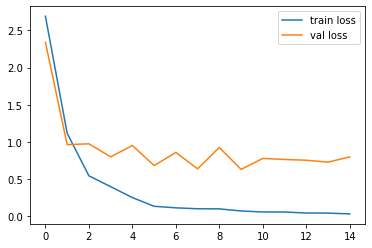

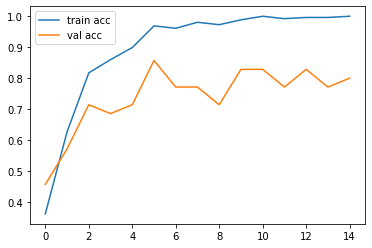

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import tensorflow as tf
tf.keras.models.save_model(model,'vgg16_model.hdf5')